In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
results1 = pd.read_csv('./logs/MLP_experiments.csv')
results2 = pd.read_csv('./logs/CNN_experiments0.5.csv')
results3 = pd.read_csv('./logs/CNN_experiments1.csv')
results4 = pd.read_csv('./logs/CNN_experiments1.5.csv')
results5 = pd.read_csv('./logs/CNN_experiments2.csv')
results6 = pd.read_csv('./logs/GraphConv_experiments.csv')
results7 = pd.read_csv('./logs/GIN_experiments.csv')

In [3]:
results = pd.concat([results1,results2,results3,results4,results5,results6,results7])
# Clean dataframe
results = results.apply(lambda x: x.apply(lambda y: y.split(' ')[1][:-1]))
results

,eeg_feature,model,hidden_channels,window_size,batch_size,learning_rate,dropout_rate,weight_decay,activation_funct,number_train_samples,...,number_test_samples,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params,train_time,best_epoch
0,'wav','MLP',32,0.5,16,0.005,0.0,0.0,'relu',1,...,4699,2.8651637700193104,0.6607788891253458,0.6007125018252852,0.632375804584892,0.6607788891253459,0.9381311058549802,5080,198.0771677494049,413
1,'wav','MLP',32,0.5,16,0.005,0.25,0.0,'relu',1,...,4699,2.9101687502064433,0.6408876888699724,0.6082729531294633,0.6644685365918824,0.6408876888699723,0.9303050192340341,5080,84.6742832660675,160
2,'wav','MLP',32,0.5,16,0.005,0.5,0.0,'relu',1,...,4699,3.0067263185331026,0.6749441370504362,0.639937319990606,0.676486825459856,0.6749441370504363,0.9571488166442367,5080,102.47405171394348,198
3,'wav','MLP',32,0.5,16,0.005,0.0,0.01,'relu',1,...,4699,2.841984506185117,0.6835164396680145,0.6338473893444219,0.6655748051077557,0.6835164396680145,0.9434488059763191,5080,225.229642868042,487
4,'wav','MLP',32,0.5,16,0.005,0.25,0.01,'relu',1,...,4699,2.883945169385937,0.6688723664609492,0.6255555536677241,0.6627863447732932,0.668872366460949,0.9314804634676837,5080,78.11803817749023,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,'raw','GIN',128,2.0,16,0.0005,0.25,0.16,'relu',8,...,1092,3.2113291157252624,0.3405448717948718,0.33752536458076143,0.36595328854112674,0.3405448717948718,0.7903947593981602,561440,46.03723740577698,77
2156,'raw','GIN',128,2.0,16,0.0005,0.5,0.16,'relu',8,...,1092,3.2105132040086684,0.32698031135531136,0.33083790562449933,0.3720507661167958,0.32698031135531136,0.8061806458571927,561440,44.111835956573486,74
2157,'raw','GIN',128,2.0,16,0.0005,0.0,0.64,'relu',8,...,1092,3.212876096968249,0.3401442307692308,0.33869476121716313,0.3483475370944249,0.3401442307692307,0.8006281873722083,561440,312.9175019264221,715
2158,'raw','GIN',128,2.0,16,0.0005,0.25,0.64,'relu',8,...,1092,3.216526810066167,0.35001717032967034,0.35109879644096725,0.37005199390889015,0.35001717032967034,0.8012117031618511,561440,35.07494783401489,53


# Dropout rate = 0.25

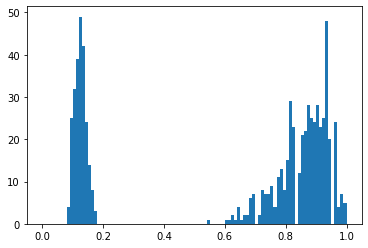

0.6116375244019225


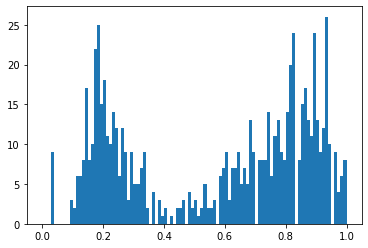

0.5658707085852342


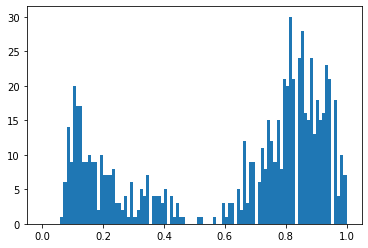

0.6196796179972793


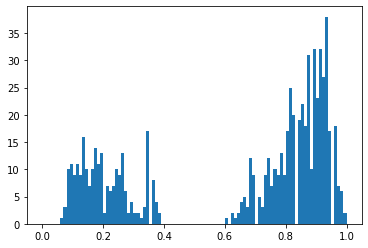

0.6327894053891525


In [29]:
for model in ['MLP','CNN','GraphConv','GIN']:
    dr_0 = results[(results['model'] == f'\'{model}\'') & (results['dropout_rate'] == '0.0')]['test_acc'].astype(float).to_numpy()
    plt.hist(np.round(dr_0,2),bins=100,range=(0,1),align='mid')
    plt.show()
    print(dr_0.mean())

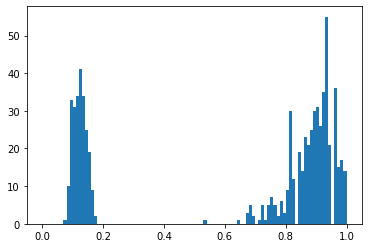

0.6308069158826326


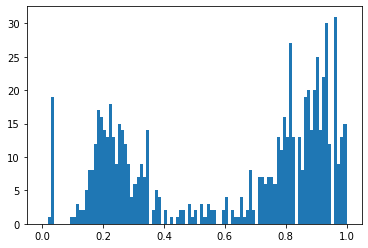

0.6058154900913121


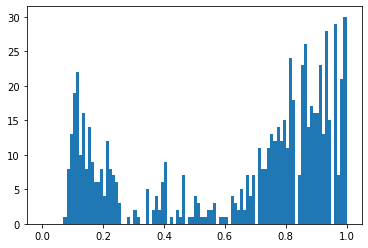

0.6400766127040366


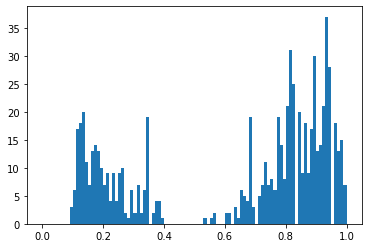

0.6313807541869203


In [30]:
for model in ['MLP','CNN','GraphConv','GIN']:
    dr_025 = results[(results['model'] == f'\'{model}\'') & (results['dropout_rate'] == '0.25')]['test_acc'].astype(float).to_numpy()
    plt.hist(np.round(dr_025,2),bins=100,range=(0,1),align='mid')
    plt.show()
    print(dr_025.mean())

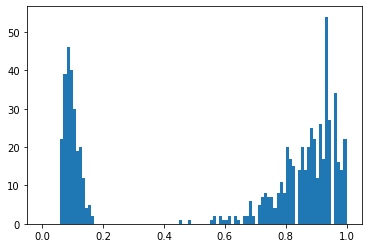

0.6108195424747713


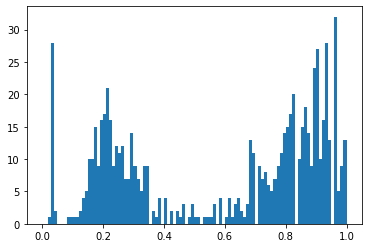

0.5869096726274188


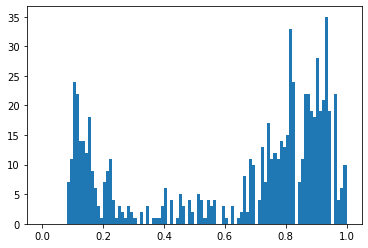

0.6336929262059134


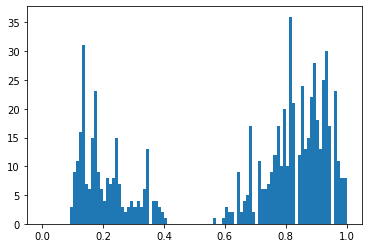

0.6276670478654416


In [31]:
for model in ['MLP','CNN','GraphConv','GIN']:
    dr_05 = results[(results['model'] == f'\'{model}\'') & (results['dropout_rate'] == '0.5')]['test_acc'].astype(float).to_numpy()
    plt.hist(np.round(dr_05,2),bins=100,range=(0,1),align='mid')
    plt.show()
    print(dr_05.mean())

# L2 rate = 0

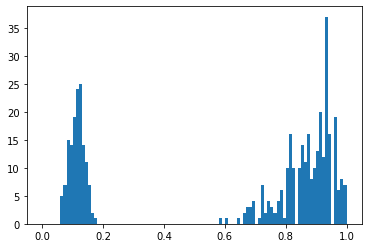

MLP 0.0
0.6173310347373873


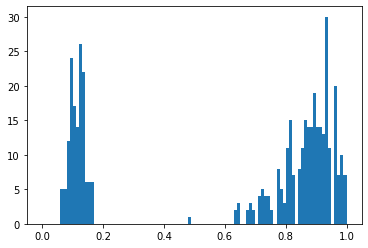

MLP 0.01
0.6176974750957612


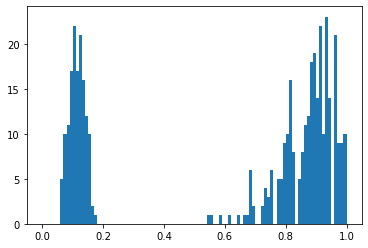

MLP 0.04
0.6180371132711108


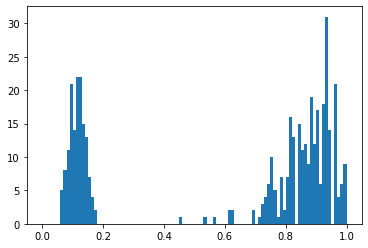

MLP 0.16
0.6157544244667603


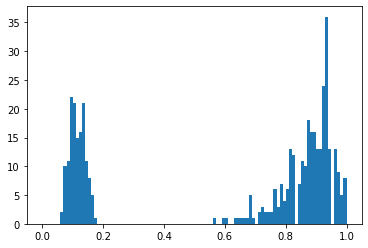

MLP 0.64
0.6199440326050417


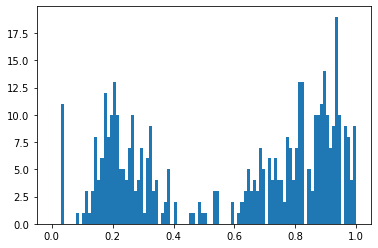

CNN 0.0
0.5856942625714883


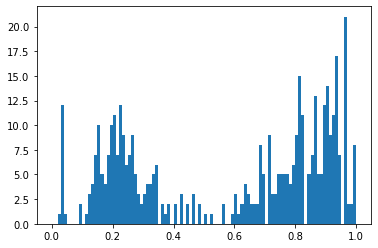

CNN 0.01
0.5831214538464243


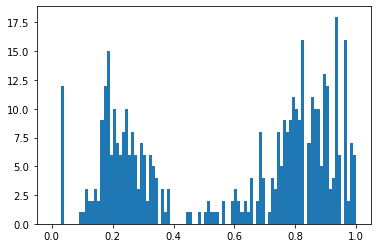

CNN 0.04
0.5834965127858449


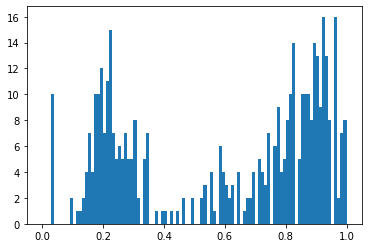

CNN 0.16
0.5940450489370809


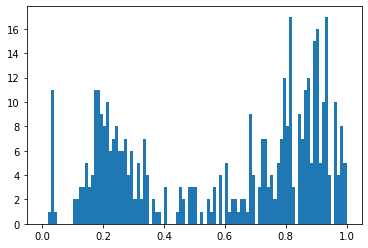

CNN 0.64
0.5846358406991035


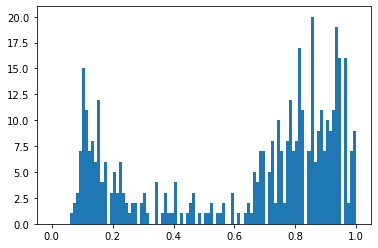

GraphConv 0.0
0.6297267754637809


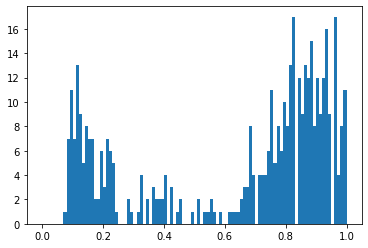

GraphConv 0.01
0.6346491822605026


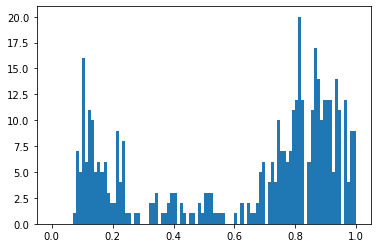

GraphConv 0.04
0.631222578475512


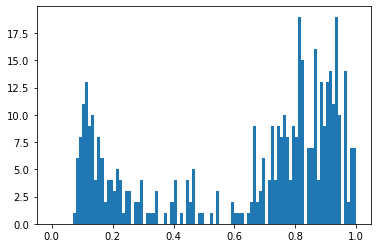

GraphConv 0.16
0.6287701766171091


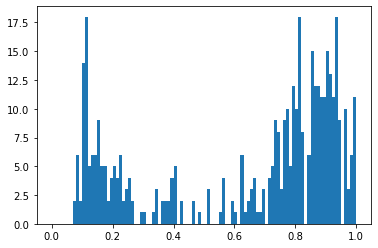

GraphConv 0.64
0.6313798820284778


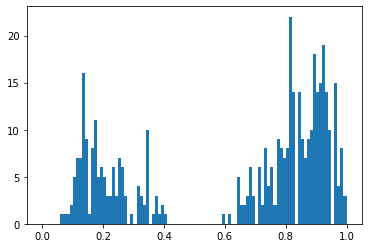

GIN 0.0
0.6326182009574534


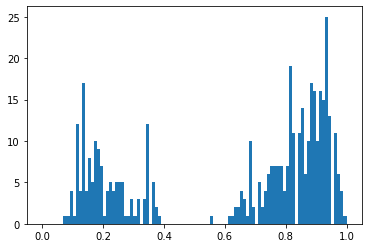

GIN 0.01
0.6319032150004888


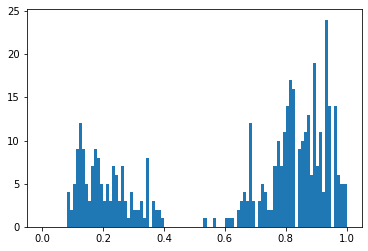

GIN 0.04
0.6280426985249322


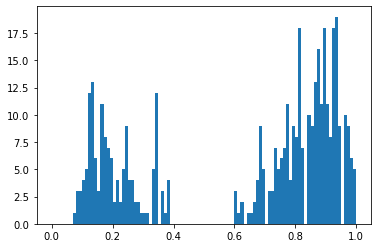

GIN 0.16
0.6310219254203628


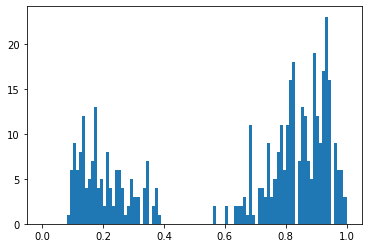

GIN 0.64
0.6294759724992866


In [35]:
for model, l2 in [(model,l2) for model in ['MLP','CNN','GraphConv','GIN'] for l2 in [0.0,0.01,0.04,0.16, 0.64] ]:
    res = results[(results['model'] == f'\'{model}\'') & (results['weight_decay'] == str(l2))]['test_acc'].astype(float).to_numpy()
    plt.hist(np.round(res,2),bins=100,range=(0,1),align='mid')
    plt.show()
    print(model,l2)
    print(res.mean())